## 1 Practical
In this task you are going to observe the effect of transfer learning on a (once) very popular architecture.
>**NOTE:** Before getting started make sure you have the required packages installed along with a suitable IDE you want to work on. Also if your computer doesn’t supports these installations, you can also work on Google Colab. Here Google provides computational capacity (to some extent) for running deep learning codes. These are same as Jupyter Notebooks.
### 1.1 Task
#### 1.1.1 Transfer Learning from ImageNet
- Download and prepare CIFAR-10 dataset (it is already available in the above mentioned libraries)


In [1]:
#imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#loading the Cifar-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#preparing the data
y_train = y_train.flatten()
y_test = y_test.flatten()

#reshaping
x_train= (x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3))/ 255.0
x_test = (x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3))/ 255.0

#converting label to one-hot encoding
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)


c:\Langage\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Langage\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Langage\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


- Use AlexNet as the model (Pytorch AlexNet)


In [2]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#AlexNet model definition
alexnet = Sequential()
alexnet.add(Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), padding='same', activation='relu', input_shape=(32,32,3)))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
alexnet.add(Conv2D(filters=192, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
alexnet.add(Flatten())
alexnet.add(Dense(units=4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(units=4096, activation='relu'))
alexnet.add(Dropout(0.5))
#extra fully connected layer with 10 neurons
alexnet.add(Dense(units=10, activation='softmax'))


- You have to perform two separate experiments
> * Train the model for CIFAR-10 data, Report the test test accuracy. (also referred as finetuning the model)

In [3]:
#compiling the model
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training the model
historic = alexnet.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

#reporting the accuracy
fig, ax = plt.subplots(2,1)
ax[0].plot(historic.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(historic.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
test_loss, test_acc = alexnet.evaluate(x_test, y_test, verbose=0)
plt.show()
print("Test accuracy:", test_acc)

Epoch 1/10
391/391 [==============================] - 319s 809ms/step - loss: 1.9815 - accuracy: 0.2102 - val_loss: 1.8200 - val_accuracy: 0.2931
Epoch 2/10
391/391 [==============================] - 308s 787ms/step - loss: 1.7247 - accuracy: 0.3338 - val_loss: 1.6286 - val_accuracy: 0.3745
Epoch 3/10
391/391 [==============================] - 328s 838ms/step - loss: 1.5796 - accuracy: 0.4104 - val_loss: 1.5235 - val_accuracy: 0.4339
Epoch 4/10
391/391 [==============================] - 336s 858ms/step - loss: 1.4734 - accuracy: 0.4600 - val_loss: 1.4433 - val_accuracy: 0.4731
Epoch 5/10
391/391 [==============================] - 357s 915ms/step - loss: 1.4074 - accuracy: 0.4885 - val_loss: 1.3961 - val_accuracy: 0.4931
Epoch 6/10
391/391 [==============================] - 347s 888ms/step - loss: 1.3393 - accuracy: 0.5186 - val_loss: 1.3251 - val_accuracy: 0.5276
Epoch 7/10
391/391 [==============================] - 316s 808ms/step - loss: 1.2902 - accuracy: 0.5393 - val_loss: 1.3113 -

> * Use the pretrained weights of AlexNet, in other words use AlexNet as a pretrained network for image classification on CIFAR-10 data (also referred as Feature Extraction), Report the test test accuracy.    
- In both the above cases remember to add an extra fully connected layer to the classifier with number of neurons = 10, because there are 10 classes in CIFAR-10 dataset. This layer will be trainable in both the cases.


Epoch 1/30
391/391 [==============================] - 39s 98ms/step - loss: 2.3016 - accuracy: 0.1109 - val_loss: 2.3007 - val_accuracy: 0.1292
Epoch 2/30
391/391 [==============================] - 41s 105ms/step - loss: 2.2995 - accuracy: 0.1163 - val_loss: 2.2989 - val_accuracy: 0.1577
Epoch 3/30
391/391 [==============================] - 37s 94ms/step - loss: 2.2975 - accuracy: 0.1329 - val_loss: 2.2972 - val_accuracy: 0.1703
Epoch 4/30
391/391 [==============================] - 38s 96ms/step - loss: 2.2955 - accuracy: 0.1433 - val_loss: 2.2955 - val_accuracy: 0.1657
Epoch 5/30
391/391 [==============================] - 39s 100ms/step - loss: 2.2936 - accuracy: 0.1551 - val_loss: 2.2939 - val_accuracy: 0.1667
Epoch 6/30
391/391 [==============================] - 36s 92ms/step - loss: 2.2916 - accuracy: 0.1484 - val_loss: 2.2923 - val_accuracy: 0.1778
Epoch 7/30
391/391 [==============================] - 41s 106ms/step - loss: 2.2897 - accuracy: 0.1663 - val_loss: 2.2908 - val_accura

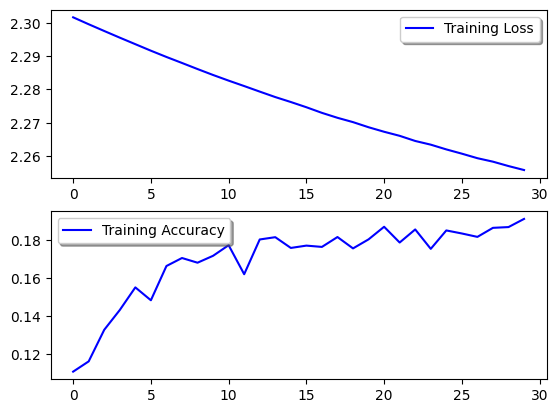

Test accuracy: 0.1467999964952469


In [12]:
#useless right?
#saving the weights 
alexnet.save_weights('alexnet_weights.h5')
#loading the weights
alexnet.load_weights('alexnet_weights.h5')
#create a new model that consists of all layers of our alexnet
feature_extractor = Sequential()
for layer in alexnet.layers[:-1]:
    feature_extractor.add(layer)

#freezing the weights of all layers
for layer in feature_extractor.layers:
    layer.trainable = False

#adding a new fully connected layer on top of the feature extractor for classification
feature_extractor.add(Dense(units=10, activation='softmax'))

#compiling the model
feature_extractor.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training the new fully connected layer on top of the feature extractor
#using the CIFAR-10 data
history = feature_extractor.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

#evaluating the accuracy of the feature extractor on the test set
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
test_loss, test_acc = feature_extractor.evaluate(x_test, y_test, verbose=0)
plt.show()
print("Test accuracy:", test_acc)

- Explain (briefly!) what is the difference between the two runs and why there is a difference in performance.\
**ANSWER:**\
In the first experiment we have initializes randomly the weights and then we have optimized them through the training with our CIFAR-10 dataset. Which made it really long to compute (55 minutes for 10 epochs).\
In the second experiment we used our pre-trained weights, since the weights have already been optimized it should be easier for our network to learn features, here we only retrain the last layer. Plus, this time it was way faster to compute (6 minutes for 10 epochs).\
Since we use the exact same datasets in both experiment the accuracy is getting worth, this could be due to overfitting. I tried incrising the epochs from  10 to 30 but it didn't change the loss that much, neither the accuracy.
#### 1.1.2 Transfer Learning from MNIST
- Prepare a CNN of your choice and train it on the MNIST data. Report the accuracy

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, 1, 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5, 1, 2)
        self.fc1 = nn.Linear(7*7*32, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.pool(self.conv1(x)))
        x = nn.functional.relu(self.pool(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Define the dataset and data loader
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=False)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=False)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, len(train_dataset)//train_loader.batch_size, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (i+1) % 10 == 0:
            print('Step [{}/{}], Test Accuracy: {:.2f}%'.format(i+1, len(test_dataset)//test_loader.batch_size, 100 * correct / total))

test_accuracy = 100 * correct / total
print('Test Accuracy: {:.2f}%'.format(test_accuracy))


Epoch [1/10], Step [100/937], Loss: 0.2906
Epoch [1/10], Step [200/937], Loss: 0.1342
Epoch [1/10], Step [300/937], Loss: 0.0544
Epoch [1/10], Step [400/937], Loss: 0.0179
Epoch [1/10], Step [500/937], Loss: 0.0587
Epoch [1/10], Step [600/937], Loss: 0.1897
Epoch [1/10], Step [700/937], Loss: 0.0410
Epoch [1/10], Step [800/937], Loss: 0.2260
Epoch [1/10], Step [900/937], Loss: 0.0621
Epoch [2/10], Step [100/937], Loss: 0.0686
Epoch [2/10], Step [200/937], Loss: 0.0358
Epoch [2/10], Step [300/937], Loss: 0.0669
Epoch [2/10], Step [400/937], Loss: 0.0107
Epoch [2/10], Step [500/937], Loss: 0.0435
Epoch [2/10], Step [600/937], Loss: 0.1064
Epoch [2/10], Step [700/937], Loss: 0.0477
Epoch [2/10], Step [800/937], Loss: 0.0151
Epoch [2/10], Step [900/937], Loss: 0.0372
Epoch [3/10], Step [100/937], Loss: 0.1281
Epoch [3/10], Step [200/937], Loss: 0.0046
Epoch [3/10], Step [300/937], Loss: 0.0094
Epoch [3/10], Step [400/937], Loss: 0.1268
Epoch [3/10], Step [500/937], Loss: 0.0090
Epoch [3/10

- Use the above model as a pretrained CNN for the SVHN dataset. Report the accuracy

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.models import resnet18

# Load the pretrained model
pretrained_model = resnet18(pretrained=True)
pretrained_model.fc = nn.Identity()

# Define the new classifier
classifier = nn.Linear(512, 10)

# Combine the pretrained model and the new classifier
new_model = nn.Sequential(pretrained_model, classifier)

# Freeze the weights of the pretrained model
for param in pretrained_model.parameters():
    param.requires_grad = False

# Define the dataset and data loader
transform = transforms.Compose([transforms.Resize((32, 32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.SVHN(root='data', split='train', transform=transform, download=True)
test_dataset = datasets.SVHN(root='data', split='test', transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the classifier's optimizer
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Train the classifier
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        features = pretrained_model(images)
        outputs = classifier(features)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, len(train_dataset)//train_loader.batch_size, loss.item()))

# Test the model
new_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        features = pretrained_model(images)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (i+1) % 10 == 0:
            print('Test Accuracy of the model on the {} test images: {} %'.format(total, 100 * correct / total))

c:\Langage\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Langage\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using downloaded and verified file: data\train_32x32.mat
Using downloaded and verified file: data\test_32x32.mat
Epoch [1/10], Step [100/1144], Loss: 2.0868
Epoch [1/10], Step [200/1144], Loss: 2.2299
Epoch [1/10], Step [300/1144], Loss: 2.0100
Epoch [1/10], Step [400/1144], Loss: 2.1626
Epoch [1/10], Step [500/1144], Loss: 2.0231
Epoch [1/10], Step [600/1144], Loss: 1.9958
Epoch [1/10], Step [700/1144], Loss: 2.0237
Epoch [1/10], Step [800/1144], Loss: 1.8927
Epoch [1/10], Step [900/1144], Loss: 1.9483
Epoch [1/10], Step [1000/1144], Loss: 1.9941
Epoch [1/10], Step [1100/1144], Loss: 2.0711
Epoch [2/10], Step [100/1144], Loss: 2.0547
Epoch [2/10], Step [200/1144], Loss: 1.7924
Epoch [2/10], Step [300/1144], Loss: 1.8647
Epoch [2/10], Step [400/1144], Loss: 2.0176
Epoch [2/10], Step [500/1144], Loss: 2.0865
Epoch [2/10], Step [600/1144], Loss: 2.0138
Epoch [2/10], Step [700/1144], Loss: 1.9101
Epoch [2/10], Step [800/1144], Loss: 2.2036
Epoch [2/10], Step [900/1144], Loss: 1.8108
Epoch

- In the third step you are performing transfer learining from MNIST to SVHN.

In [11]:
import ssl

torch.save(model.state_dict(), 'cnn-mnist.pt')
preprocess = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
ssl._create_default_https_context = ssl._create_unverified_context

svhn_data = datasets.SVHN(root='./data/svhn', split='train', transform=preprocess, download=True)
svhn_test_data = datasets.SVHN(root='./data/svhn', split='test', transform=preprocess, download=True)
train_size = int(0.9*len(svhn_data))
test_size = len(svhn_data) - train_size
svhn_train_set, svhn_val_set = torch.utils.data.random_split(svhn_data, [train_size,test_size])

svhn_train_loader = torch.utils.data.DataLoader(dataset=svhn_train_set, batch_size=64, shuffle=True)
svhn_test_loader = torch.utils.data.DataLoader(dataset=svhn_test_data, batch_size=64, shuffle=False)
svhn_val_loader = torch.utils.data.DataLoader(dataset=svhn_val_set, batch_size= 64, shuffle=False)

pretrained_model = CNN()
pretrained_model.load_state_dict(torch.load('cnn-mnist.pt'))
optimizer = optim.Adam(pretrained_model.parameters(), lr=0.001)
for params in pretrained_model.parameters():
    params.requires_grad = False

pretrained_model.conv1 = nn.Sequential(
    nn.Conv2d(3,1,1),
    model.conv1
)
pretrained_model.last_linear = nn.Sequential(
    nn.Linear(in_features=100, out_features=100),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=100, out_features=10),
)
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(svhn_train_loader):
        optimizer.zero_grad()
        outputs = pretrained_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, len(svhn_train_set)//svhn_train_loader.batch_size, loss.item()))

# Test the model
pretrained_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(svhn_test_loader):
        outputs = pretrained_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (i+1) % 10 == 0:
            print('Step [{}/{}], Test Accuracy: {:.2f}%'.format(i+1, len(svhn_test_data)//svhn_test_loader.batch_size, 100 * correct / total))

test_accuracy = 100 * correct / total
print('Test Accuracy: {:.2f}%'.format(test_accuracy))


Using downloaded and verified file: ./data/svhn\train_32x32.mat
Using downloaded and verified file: ./data/svhn\test_32x32.mat
Epoch [1/10], Step [100/1030], Loss: 3.3315
Epoch [1/10], Step [200/1030], Loss: 3.1645
Epoch [1/10], Step [300/1030], Loss: 3.0967
Epoch [1/10], Step [400/1030], Loss: 3.2155
Epoch [1/10], Step [500/1030], Loss: 3.2306
Epoch [1/10], Step [600/1030], Loss: 3.6482
Epoch [1/10], Step [700/1030], Loss: 3.1786
Epoch [1/10], Step [800/1030], Loss: 3.1740
Epoch [1/10], Step [900/1030], Loss: 3.4580
Epoch [1/10], Step [1000/1030], Loss: 3.7884
Epoch [2/10], Step [100/1030], Loss: 3.2257
Epoch [2/10], Step [200/1030], Loss: 3.5579
Epoch [2/10], Step [300/1030], Loss: 3.8133
Epoch [2/10], Step [400/1030], Loss: 3.3742
Epoch [2/10], Step [500/1030], Loss: 3.1836
Epoch [2/10], Step [600/1030], Loss: 3.4071
Epoch [2/10], Step [700/1030], Loss: 3.4735
Epoch [2/10], Step [800/1030], Loss: 3.1275
Epoch [2/10], Step [900/1030], Loss: 3.3214
Epoch [2/10], Step [1000/1030], Loss